# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

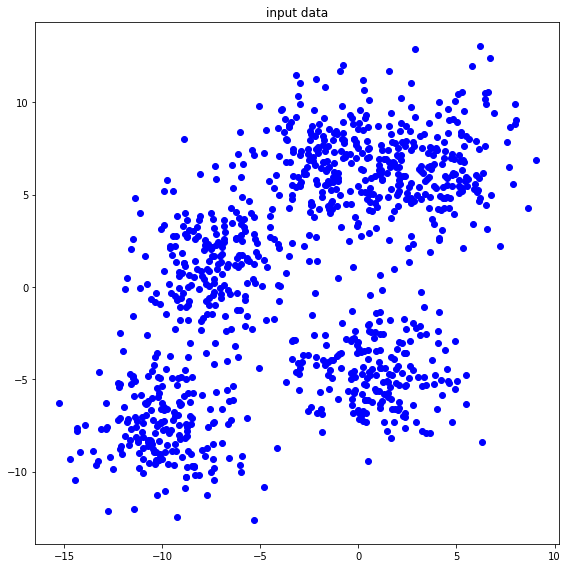

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [55]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    distance = np.power(np.sum(np.power((feature - center), 2), axis=1), 0.5)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [56]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_index = np.where(label_feature == label)[0]
    centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [57]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis=1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [87]:
number_cluster          = 2
number_iteration        = 1000     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [88]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    distance = np.zeros((len(feature), number_cluster))
    for label in range(number_cluster):
        centroid_iteration_02[i, label, :] = compute_centroid(feature, label_feature_02, label)
        if np.isnan(centroid_iteration_02[i, label, 0]):
            centroid_iteration_02[i, label, :] = centroid_iteration_02[i-1, label, :]
        distance[:, label] = compute_distance(feature, centroid_iteration_02[i, label, :])
    label_feature_02 = compute_label(distance)
    loss_iteration_02[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_02], 2)) / len(feature)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [89]:
number_cluster          = 4
number_iteration        = 1000     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [90]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    distance = np.zeros((len(feature), number_cluster))
    for label in range(number_cluster):
        centroid_iteration_04[i, label, :] = compute_centroid(feature, label_feature_04, label)
        if np.isnan(centroid_iteration_04[i, label, 0]):
            centroid_iteration_04[i, label, :] = centroid_iteration_04[i-1, label, :]
        distance[:, label] = compute_distance(feature, centroid_iteration_04[i, label, :])
    label_feature_04 = compute_label(distance)
    loss_iteration_04[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_04], 2)) / len(feature)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [91]:
number_cluster          = 8
number_iteration        = 1000     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [92]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    distance = np.zeros((len(feature), number_cluster))
    for label in range(number_cluster):
        centroid_iteration_08[i, label, :] = compute_centroid(feature, label_feature_08, label)
        if np.isnan(centroid_iteration_08[i, label, 0]):
            centroid_iteration_08[i, label, :] = centroid_iteration_08[i-1, label, :]
        distance[:, label] = compute_distance(feature, centroid_iteration_08[i, label, :])
    label_feature_08 = compute_label(distance)
    loss_iteration_08[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_08], 2)) / len(feature)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

C:\Users\주영석\AppData\Local\Temp\ipykernel_1964\24562062.py:8: RuntimeWarning: invalid value encountered in true_divide
  centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)


## the number of clusters $K = 16$

In [93]:
number_cluster          = 16
number_iteration        = 1000     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [94]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    distance = np.zeros((len(feature), number_cluster))
    for label in range(number_cluster):
        centroid_iteration_16[i, label, :] = compute_centroid(feature, label_feature_16, label)
        if np.isnan(centroid_iteration_16[i, label, 0]):
            centroid_iteration_16[i, label, :] = centroid_iteration_16[i-1, label, :]
        distance[:, label] = compute_distance(feature, centroid_iteration_16[i, label, :])
    label_feature_16 = compute_label(distance)
    loss_iteration_16[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_16], 2)) / len(feature)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

C:\Users\주영석\AppData\Local\Temp\ipykernel_1964\24562062.py:8: RuntimeWarning: invalid value encountered in true_divide
  centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)


---

---

## functions for presenting the results

---

---

In [78]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [79]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [80]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [81]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [82]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [83]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [84]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [85]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [123]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_02[:, :, 0], centroid_iteration_02[:, :, 1], '-')
    plt.plot(centroid_iteration_02[0, :, 0], centroid_iteration_02[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_02[-1, :, 0], centroid_iteration_02[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(2)] + ['initial', 'final'])
    plt.show()
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [124]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_04[:, :, 0], centroid_iteration_04[:, :, 1], '-')
    plt.plot(centroid_iteration_04[0, :, 0], centroid_iteration_04[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_04[-1, :, 0], centroid_iteration_04[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(4)] + ['initial', 'final'])
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [125]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_08[:, :, 0], centroid_iteration_08[:, :, 1], '-')
    plt.plot(centroid_iteration_08[0, :, 0], centroid_iteration_08[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_08[-1, :, 0], centroid_iteration_08[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(8)] + ['initial', 'final'])
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [126]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_16[:, :, 0], centroid_iteration_16[:, :, 1], '-')
    plt.plot(centroid_iteration_16[0, :, 0], centroid_iteration_16[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_16[-1, :, 0], centroid_iteration_16[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(16)] + ['initial', 'final'])
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.7014611424
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.3874060820
**************************************************
## [RESULT 05]
**************************************************


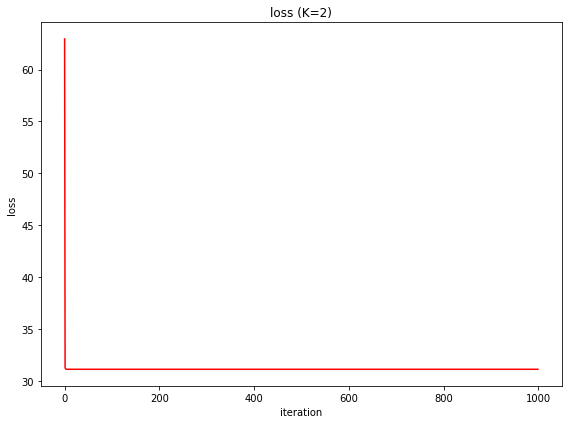

**************************************************
## [RESULT 06]
**************************************************


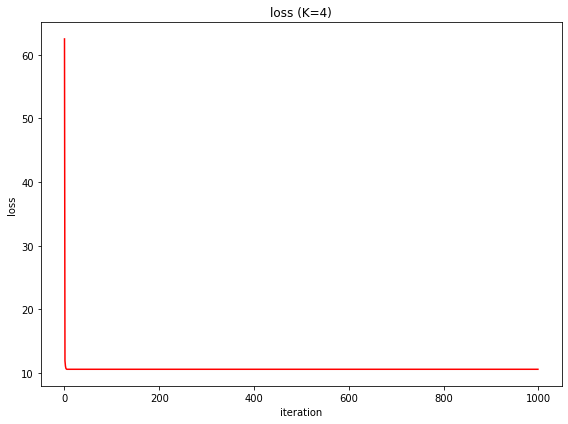

**************************************************
## [RESULT 07]
**************************************************


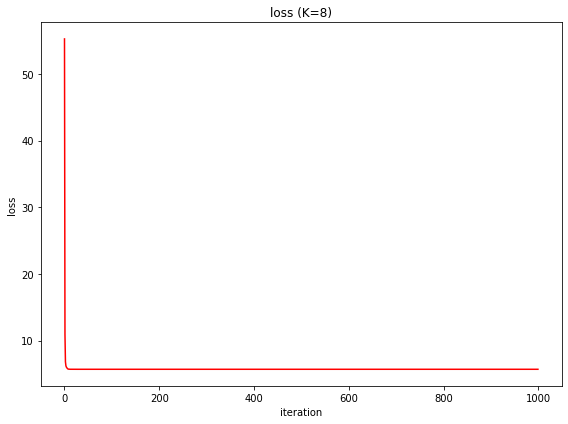

**************************************************
## [RESULT 08]
**************************************************


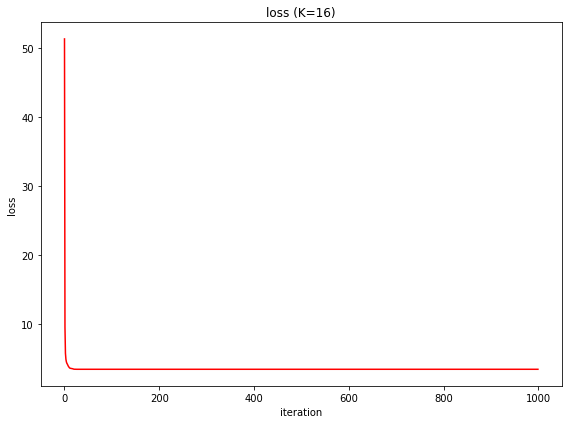

**************************************************
## [RESULT 09]
**************************************************


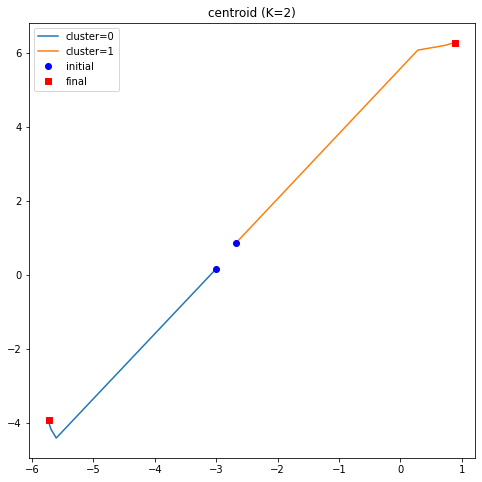

**************************************************
## [RESULT 10]
**************************************************


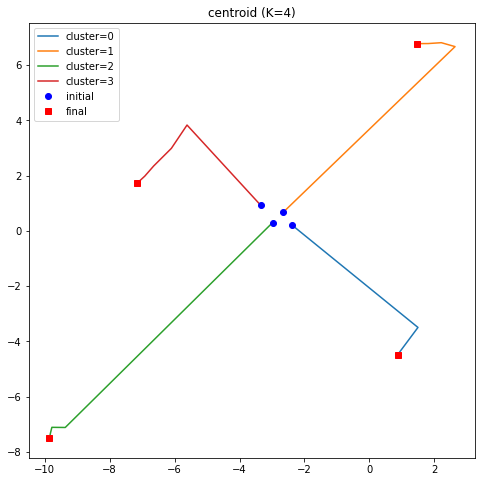

**************************************************
## [RESULT 11]
**************************************************


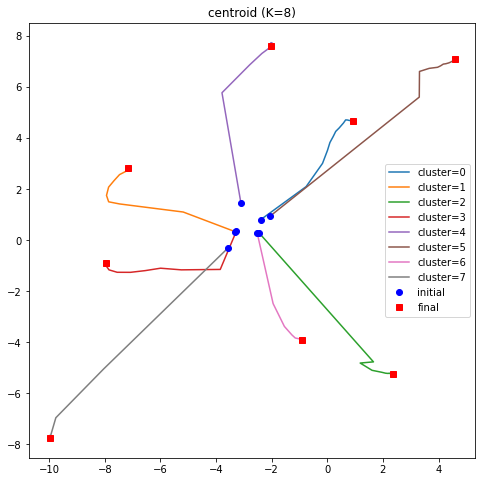

**************************************************
## [RESULT 12]
**************************************************


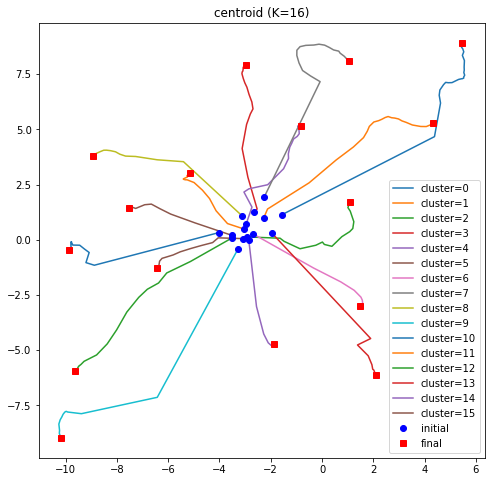

In [127]:
# number_result = 16
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)